In [4]:
import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="robotic-tract-334610-6605cbffd65c.json"

In [262]:
import numpy as np
import pandas as pd
from google.cloud import bigquery
client = bigquery.Client()
import random
random.seed(38)
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab

In [263]:
# Join Etherium and Polygon Datasets based on the address

count_token_transactions = """
SELECT
  from_address,
  COUNT(*) as count
FROM
  `bigquery-public-data.crypto_ethereum.token_transfers` AS token_transfers
WHERE TRUE
  AND DATE(block_timestamp) >= '2021-01-01' AND DATE(block_timestamp) < '2022-01-01'
GROUP BY from_address
ORDER BY count DESC
"""

In [264]:
count_token_transactions = client.query(count_token_transactions).to_dataframe()
count_token_transactions.head()

,from_address,count
0,0x0000000000000000000000000000000000000000,26890884
1,0x7a250d5630b4cf539739df2c5dacb4c659f2488d,13992411
2,0x74de5d4fcbf63e00296fd95d33236b9794016631,4811261
3,0xe592427a0aece92de3edee1f18e0157c05861564,3085546
4,0x0d4a11d5eeaac28ec3f61d100daf4d40471f1852,2458154


In [ ]:
count_token_transactions.to_csv("count_token_transactions.csv")

In [282]:
randomNum = random.randint(30,100)
count_token_transactions.loc[randomNum]

from_address    0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98
count                                               296676
Name: 88, dtype: object

In [284]:
sent_from_selected_address = """
SELECT 
  token_address,
  symbol,
  name,
  from_address,
  to_address,
  value,
  token_transfers.block_timestamp as date
FROM
  `bigquery-public-data.crypto_ethereum.token_transfers` AS token_transfers,
  `bigquery-public-data.crypto_ethereum.tokens` AS tokens
WHERE TRUE
  AND token_transfers.token_address = tokens.address
  AND from_address = '0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98'
  AND DATE(token_transfers.block_timestamp) >= '2021-01-01'
  AND DATE(token_transfers.block_timestamp) < '2022-01-01'
"""

In [285]:
sent_from_selected_address = client.query(sent_from_selected_address).to_dataframe()
sent_from_selected_address.head()

,token_address,symbol,name,from_address,to_address,value,date
0,0x846c66cf71c43f80403b51fe3906b3599d63336f,PMA,PumaPay,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0xdbd428e7fab9c28bbd626297286cca3bedf88ca0,9884506906701770000000000,2021-12-31 07:31:53+00:00
1,0xb97048628db6b661d4c2aa833e95dbe1a905b280,PAY,TenX Pay Token,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0xd1f7928bb495504c55fe9af31a1b43201007f83f,27143000000000000000000,2021-12-31 04:40:31+00:00
2,0x72dd4b6bd852a3aa172be4d6c5a6dbec588cf131,NGC,NAGA Coin,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0xee1cb8ed4bd5765efe7fcf90ab1035420a392a36,10138000000000000000000,2021-12-31 19:11:53+00:00
3,0x814e0908b12a99fecf5bc101bb5d0b8b5cdf7d26,MDT,Measurable Data Token,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0x84a8381447c449ecec8abe4a88244333f96fe758,358845000000000000000000,2021-12-31 10:25:01+00:00
4,0x846c66cf71c43f80403b51fe3906b3599d63336f,PMA,PumaPay,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,0xdbd428e7fab9c28bbd626297286cca3bedf88ca0,9909973000000000000000000,2021-12-31 07:34:11+00:00


In [288]:
sent_from_selected_address.to_csv("sent_from_0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98.csv")

In [287]:
sent_from_selected_address["token_address"].nunique()

198

In [290]:
sent_from_selected_address["name"].value_counts()[:20]

Tether USD                         120827
ChainLink Token                      7761
Quant                                7383
Enjin Coin                           6297
OMGToken                             5256
Basic Attention Token                3837
Decentraland MANA                    3548
Molecular Future                     2596
0x Protocol Token                    2485
Numeraire                            2411
CRO                                  2063
Healthcare Administration Token      1959
PowerLedger                          1918
Pundi X Token                        1765
Civic                                1751
KOK Coin                             1697
Trace Token                          1611
UniBright                            1527
Morpheus.Network                     1444
StorjToken                           1319
Name: name, dtype: int64

In [291]:
sent_to_selected_address = """
SELECT 
  token_address,
  symbol,
  name,
  from_address,
  to_address,
  value,
  token_transfers.block_timestamp as date
FROM
  `bigquery-public-data.crypto_ethereum.token_transfers` AS token_transfers,
  `bigquery-public-data.crypto_ethereum.tokens` AS tokens
WHERE TRUE
  AND token_transfers.token_address = tokens.address
  AND to_address = '0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98'
  AND DATE(token_transfers.block_timestamp) >= '2021-01-01'
  AND DATE(token_transfers.block_timestamp) < '2022-01-01'
"""

In [292]:
sent_to_selected_address = client.query(sent_to_selected_address).to_dataframe()
sent_to_selected_address.head()

,token_address,symbol,name,from_address,to_address,value,date
0,0x0e8d6b471e332f140e7d9dbb99e5e3822f728da6,ABYSS,ABYSS,0xf482185caca7af8e1311c69eb689adb2f7c24b31,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,8320000000000000000000,2021-02-17 18:51:33+00:00
1,0x8207c1ffc5b6804f6024322ccf34f29c3541ae26,OGN,OriginToken,0x1920b4fcd44c11937ec2c0018c0794b51e976c48,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,5721000000000000000000,2021-02-17 14:11:53+00:00
2,0x0e8d6b471e332f140e7d9dbb99e5e3822f728da6,ABYSS,ABYSS,0xec8daf6e747144b863706c2c0f64382a3b71ebf6,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,1232810210760000000000,2021-02-17 11:19:24+00:00
3,0x0abdace70d3790235af448c88547603b945604ea,DNT,district0x Network Token,0x1b9ed03469d173310c6c196b134648b945ef1384,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,566200000000000000000,2021-02-17 08:39:42+00:00
4,0x26db5439f651caf491a87d48799da81f191bdb6b,CBC,CashBetCoin,0x9652b6a35a516154cdf1ff31cb3af0d0534e8658,0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98,2717161649004,2021-02-17 22:43:42+00:00


In [293]:
sent_to_selected_address["token_address"].nunique()

193

In [296]:
sent_to_selected_address.to_csv("sent_to_0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98.csv")

**tokens that she bought**

In [303]:
tokens_bought = sent_to_selected_address["name"].value_counts()

**tokens that she sold**

In [304]:
tokens_sold = sent_from_selected_address["name"].value_counts()

**Tokens she made more transactions for buying than selling**

In [305]:
(sent_to_selected_address["name"].value_counts()-sent_from_selected_address["name"].value_counts()).sort_values(ascending=False)

Molecular Future                    20723.0
KOK Coin                             6360.0
SIRIN                                2269.0
Endor Protocol Token                 2239.0
Healthcare Administration Token      1910.0
Orbs                                 1840.0
IQONIQ                               1248.0
TenX Pay Token                       1200.0
UniBright                            1007.0
DMarket Token                         790.0
Celsius                               789.0
CRO                                   782.0
12Ships                               633.0
Cindicator Token                      616.0
PlayChip                              393.0
Enigma                                325.0
Spendcoin                             310.0
Republic Token                        290.0
NAGA Coin                             259.0
Kyber Network Crystal                 250.0
Dragon                                243.0
InsightProtocol                       241.0
Morpheus.Network                

In [311]:
for token in tokens_bought.keys():
    buying_value = sent_to_selected_address.loc[sent_to_selected_address.name==token]["value"].sum()
    selling_value = sent_from_selected_address.loc[sent_from_selected_address.name==token]["value"].sum()
    still_exist = (int(buying_value)-int(selling_value))
    print("EXISTS: "+ token + "\t" if still_exist>0 else "NOT EXISTS: " + token)

NOT EXISTS: Tether USD
EXISTS: Molecular Future	
EXISTS: KOK Coin	
NOT EXISTS: ChainLink Token
NOT EXISTS: Enjin Coin
NOT EXISTS: Quant
EXISTS: Healthcare Administration Token	
EXISTS: Endor Protocol Token	
EXISTS: CRO	
EXISTS: SIRIN	
NOT EXISTS: Basic Attention Token
EXISTS: Orbs	
EXISTS: UniBright	
NOT EXISTS: 0x Protocol Token
NOT EXISTS: OMGToken
NOT EXISTS: Decentraland MANA
EXISTS: TenX Pay Token	
EXISTS: Celsius	
EXISTS: Trace Token	
EXISTS: Morpheus.Network	
EXISTS: DMarket Token	
EXISTS: IQONIQ	
NOT EXISTS: Numeraire
EXISTS: PumaPay	
EXISTS: Spendcoin	
NOT EXISTS: Pundi X Token
EXISTS: Cindicator Token	
NOT EXISTS: Status Network Token
EXISTS: 12Ships	
NOT EXISTS: PowerLedger
EXISTS: NAGA Coin	
EXISTS: Dragon	
NOT EXISTS: Ripio Credit Network Token
EXISTS: Swipe	
NOT EXISTS: StorjToken
EXISTS: Republic Token	
NOT EXISTS: Function X
NOT EXISTS: Reserve Rights
NOT EXISTS: FunFair
NOT EXISTS: Civic
NOT EXISTS: Mainframe Token
EXISTS: DEAPCOIN	
EXISTS: PlayChip	
EXISTS: Enigma	
NO

In [356]:
pd.set_option('display.max_rows', 500)
selected_token_sent_to = sent_to_selected_address.loc[sent_to_selected_address.name=="Universal Euro"].sort_values("date")[["date", "value"]]

In [349]:
selected_token_sent_from=sent_from_selected_address.loc[sent_from_selected_address.name=="Universal Euro"].copy()

In [355]:
selected_token_sent_from = sent_from_selected_address.loc[sent_from_selected_address.name=="Universal Euro"].copy()
selected_token_sent_from["value"] = pd.to_numeric(selected_token_sent_from["value"]).apply(lambda x: x*-1)
selected_token_sent_from = selected_token_sent_from.sort_values("date")[["date", "value"]]

In [360]:
selected_token_sent_to.append(selected_token_sent_from, ignore_index=True).sort_values("date").to_csv("0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98_UPEUR_transactions.csv")

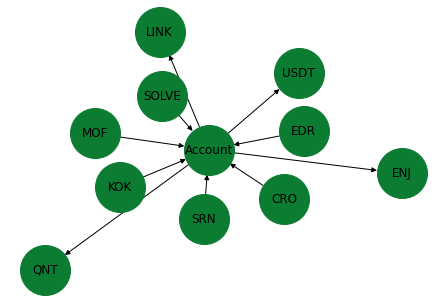

In [337]:
tokens_bought_symbol = sent_to_selected_address["symbol"].value_counts()[:10]
G = nx.DiGraph()
for token in tokens_bought_symbol.keys():
    buying_value = sent_to_selected_address.loc[sent_to_selected_address.symbol==token]["value"].sum()
    selling_value = sent_from_selected_address.loc[sent_from_selected_address.symbol==token]["value"].sum()
    still_exist = (int(buying_value)-int(selling_value))
    if still_exist>0:
        G.add_edges_from([(token, 'Account')])
    else:
        G.add_edges_from([('Account', token)])
pos=nx.spring_layout(G, seed = 44, k = 0.8)
nx.draw(G,pos, node_size=2500, with_labels=True, node_color='#0B7C32')
pylab.show()

In [329]:
balance_selected_address = """
SELECT
    eth_balance
FROM
    `bigquery-public-data.crypto_ethereum.balances` AS balances
WHERE TRUE
    AND address = '0xfbb1b73c4f0bda4f67dca266ce6ef42f520fbb98'
"""

In [330]:
balance_selected_address = client.query(balance_selected_address).to_dataframe()
balance_selected_address

,eth_balance
0,8483299495614460181193.000000000


In [260]:
count_token_transactions_high_balance = """
SELECT
  token_transfers.from_address,
  COUNT(*) as count
FROM
  `bigquery-public-data.crypto_ethereum.token_transfers` AS token_transfers,
  `bigquery-public-data.crypto_ethereum.balances` AS balances,
    (
    SELECT CAST(AVG(balances1.eth_balance/POWER(10,15)) AS INT64) as avg_balance
    FROM 
        `bigquery-public-data.crypto_ethereum.balances` as balances1,
        `bigquery-public-data.crypto_ethereum.token_transfers` AS token_transfers1
    WHERE TRUE
        AND token_transfers1.from_address = balances1.address
        AND DATE(token_transfers1.block_timestamp) >= '2021-12-01' AND DATE(token_transfers1.block_timestamp) <= '2022-01-15'
    )
WHERE TRUE
  AND token_transfers.from_address = balances.address
  AND DATE(token_transfers.block_timestamp) >= '2021-12-01' AND DATE(token_transfers.block_timestamp) <= '2022-01-15'
  AND (CAST(balances.eth_balance AS INT64))/POWER(10,16)>avg_balance
GROUP BY token_transfers.from_address
ORDER BY count DESC
"""

In [261]:
count_token_transactions_high_balance = client.query(count_token_transactions_high_balance).to_dataframe()
count_token_transactions_high_balance.head()

BadRequest: 400 int64 out of range: 11326881149989362760820

(job ID: 9665f1df-0672-45c2-a86b-d5c0e5e877a2)

                                                 -----Query Job SQL Follows-----                                                  

    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |
   1:
   2:SELECT
   3:  token_transfers.from_address,
   4:  COUNT(*) as count
   5:FROM
   6:  `bigquery-public-data.crypto_ethereum.token_transfers` AS token_transfers,
   7:  `bigquery-public-data.crypto_ethereum.balances` AS balances,
   8:    (
   9:    SELECT CAST(AVG(balances1.eth_balance/POWER(10,15)) AS INT64) as avg_balance
  10:    FROM 
  11:        `bigquery-public-data.crypto_ethereum.balances` as balances1,
  12:        `bigquery-public-data.crypto_ethereum.token_transfers` AS token_transfers1
  13:    WHERE TRUE
  14:        AND token_transfers1.from_address = balances1.address
  15:        AND DATE(token_transfers1.block_timestamp) >= '2021-12-01' AND DATE(token_transfers1.block_timestamp) <= '2022-01-15'
  16:    )
  17:WHERE TRUE
  18:  AND token_transfers.from_address = balances.address
  19:  AND DATE(token_transfers.block_timestamp) >= '2021-12-01' AND DATE(token_transfers.block_timestamp) <= '2022-01-15'
  20:  AND (CAST(balances.eth_balance AS INT64))/POWER(10,16)>avg_balance
  21:GROUP BY token_transfers.from_address
  22:ORDER BY count DESC
    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |    .    |